# Logistic Regression

$\bullet$ Logistic regression is better suited for classification problems whereas linear regression is useful in predicting continuous data.  

$\bullet$ Classification problems are problems where the targets to be predicted are assigned a discrete value (label or class) for each input.   

$\bullet$ Classification problems can be binary or multiclass.

In a logistic model,
1. we take a weighted sum of the input features.
2. we apply the sigmoid function to the result to obtain a number between _0_ and _1._
3. this number represents the probability of the input being classified as _'yes'._
4. we use the cross entropy loss function instead of the $rmse.$

The sigmoid (activation function) is given by,

$$\sigma(z) = \frac{1}{1 + e^{-z}}.$$

The cross entropy loss, $\mathcal{L}(\hat{y},y)$ is also given by,

$$\mathcal{L}(\hat{y},y) = - (y \log \hat{y} + (1 - y) \log (1 - \hat{y}))$$

So the steps involved can be illustrated below.

$$z = w_{1}x_{1} + w_{2}x_{2} + b \quad \longrightarrow \quad \sigma(z) \quad\longrightarrow  \quad\mathcal{L}(\hat{y},y)$$


Now that we have the theoretical background, we start the actual work.

In [76]:
# Importing the needed libraries
import joblib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from warnings import filterwarnings

filterwarnings('ignore')


sns.set_style('darkgrid')

In [2]:
# Reading the data
rain_df = pd.read_csv('./weatherAUS.csv')
rain_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

We have 145460 observations and 23 features in the dataset.

In [3]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The _'RainToday'_ and _'RainTomorrow'_ have some null values.

In [4]:
rain_df[rain_df['RainToday'].isna() | rain_df['RainTomorrow'].isna()].count()

Date             4673
Location         4673
MinTemp          3656
MaxTemp          3719
Rainfall         1412
Evaporation      1577
Sunshine         1643
WindGustDir      3510
WindGustSpeed    3515
WindDir9am       3767
WindDir3pm       4115
WindSpeed9am     3961
WindSpeed3pm     4142
Humidity9am      3536
Humidity3pm      3667
Pressure9am      3351
Pressure3pm      3414
Cloud9am         1410
Cloud3pm         1409
Temp9am          3562
Temp3pm          3688
RainToday        1412
RainTomorrow     1406
dtype: int64

As we can see from the results above, there are over a thousand missing entries in these two columns. Since these columns will most likely be the targets, and we cannot (at least while training) work with absent data, we remove these datapoints from the dataframe.

In [5]:
rain_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [6]:
rain_df.shape

(140787, 23)

Now, as we can see, all the the null values have been removed and the actual datapoints is the same as the total datapoints, which is what we wanted.

# Exploratory Data Analysis and Visualizations.

We start of by looking at the rainy days for each location.

In [7]:
rain_df['Location'].nunique()

49

There are 49 distinct locations in the dataset. We wish to find the number of days it rained in each location.

In [8]:
fig1 = px.histogram(rain_df, x='Location', color='RainToday', title='Location Vs. Rainy Days')
fig1.update_layout(bargap=0.1)
fig1.show()

We can see from the plot above that on average, each location seem to have the same number of measurements. That is, they were daily recordings for most regions. The regions, _'Uluru',_ _'Katherine'_ and _'Nhil'_ seem to have lesser recordings than the other locations. It may that these locations only recorded some of the days and not all days. It could be that these locations lacked facilities and equipments to take these measurements or perhaps, some datapoints were lost. Also, generally, there seem to be about 20% records of rainfall in each location although a few resgions seem to have recorded higher rainfalls. Because of the dynamism in the rainfall by location, we can say that location is a factor that determines whether there will be rainfall or not.

Next, we take a look at the temperatures at 3pm

In [9]:
rain_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
fig2 = px.histogram(rain_df, x='Temp3pm', color='RainTomorrow', marginal='box', title='Temperature at 3pm Vs. RainTomorrow')
fig2.show()

This appears to be distributed normally. Most of the temperature observation seem to lie between 8 and 42. It seems there ins an increase in the probability of raining tomorrow as the temperature increases to the mea value.

## PREPROCESSING AND TRAINING THE MODEL

### Splitting the dataset into train, validation and test sets

In [11]:
train_val_df, test_df = train_test_split(rain_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

Whenever using time series data, it is best to split the data using the date. The training set shoud be the earlier dates and the test set should be the most recent dates.

<Axes: title={'center': 'Number of observations per year'}, xlabel='Date', ylabel='count'>

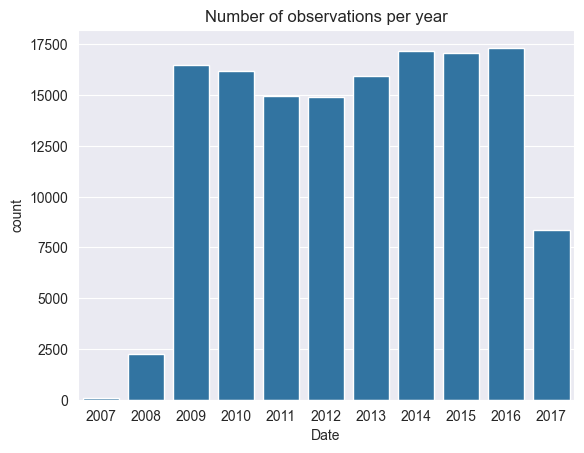

In [12]:
plt.title('Number of observations per year')
sns.countplot(x=pd.to_datetime(rain_df['Date']).dt.year)

So in this project, we will use the years before 2015 for the training set, 2015 for the validation set and beyond 2015 for the test set

In [13]:
year = pd.to_datetime(rain_df['Date']).dt.year

train_df = rain_df[year < 2015]
val_df = rain_df[year == 2015]
test_df = rain_df[year > 2015]

In [14]:
np.unique(pd.to_datetime(train_df['Date']).dt.year)

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

As we can see in the code above, the distinct years in the training set is from 2007 to 2014. Similarly,

In [15]:
np.unique(pd.to_datetime(val_df['Date']).dt.year)

array([2015])

The validation set has only one year (2015).

In [16]:
np.unique(pd.to_datetime(test_df['Date']).dt.year)

array([2016, 2017])

### IDENTIFYING INPUT AND TARGET COLUMNS

Since we would want to train the model to be able to make predictions on whether it will rain tomorrow, the date column is not particularly useful in this case

In [17]:
train_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
input_cols = train_df.columns[1:-1]
input_cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [19]:
target_col = train_df.columns[-1]
target_col

'RainTomorrow'

We can now get the inputs and target for the training, validation and test sets.

In [20]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

Now, we get all the numeric and categorical columns.

In [21]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [22]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [23]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

Since the ranges of the numerical column are somewhat different, we scale them to a range of 0 to 1 using the MinMaxScaler.

Also, we check the categorical columns to see the individual categories and how we can encode them numerically

In [24]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### IMPUTING MISSING VALUES

Before we can go ahead with the preprocessing and model training, we must firt impute the missing values of the numerical columns.

In [25]:
imputer = SimpleImputer(strategy='mean')

Now, let's check the number of missing values in each of the numeric columns

In [26]:
rain_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

We do the imputation of missing values on the entire dataset the missing values might spread across the training, validation and test sets

In [27]:
imputer.fit(rain_df[numeric_cols]) # This calculates the minimum and maximum values from each column.

SimpleImputer()

We can check these values using the .statistics_ property of the imputer object.

In [28]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

We can now fill the missing values of the training, validation and test sets using the .transfrom method of the imputer object.

In [29]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

If we check now, we will see that there are no missing values.

In [30]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### SCALING NUMERIC FEATURES

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(rain_df[numeric_cols])

MinMaxScaler()

In [33]:
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [34]:
scaler.data_max_

array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
        100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.7])

Now, we can scale the training, validation and test sets.

In [35]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### ENCODING CATEGORICAL DATA

First we fill all the missing values of the categorical columns with 'Unknown'

In [36]:
rain_df2 = rain_df[categorical_cols].fillna('Unknown')

In [37]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [38]:
encoder.fit(rain_df2)

OneHotEncoder(handle_unknown='ignore')

In [39]:
(encoder.categories_)

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [40]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

# encoder.get_feature_names_out(categorical_cols)

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

Now, we can add the encoded columns to the training, validation and test sets.

In [41]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown')).toarray()

In [42]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown')).toarray()

In [43]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown')).toarray()

### SAVING THE PREPROCESSED DATA TO DISK

Saving the preprocessed input data to the disk

In [44]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

Saving the preprocessed target data to the disk

In [45]:
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

### READING THE SAVED DATA FROM THE DISK

In [46]:
train_inputs = pd.read_parquet('./train_inputs.parquet')
val_inputs = pd.read_parquet('./val_inputs.parquet')
test_inputs = pd.read_parquet('./test_inputs.parquet')


train_target = pd.read_parquet('./train_target.parquet')
val_target = pd.read_parquet('./val_target.parquet')
test_target = pd.read_parquet('./test_target.parquet')

## TRAINING THE LOGISTIC MODEL

In [47]:
model = LogisticRegression(solver='liblinear')

In [48]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_target)

LogisticRegression(solver='liblinear')

In [49]:
model.coef_.tolist()

[[0.8986304803363553,
  -2.8799135841531216,
  3.1627780186584324,
  0.8542489570130005,
  -1.6713938837296933,
  6.764403986281332,
  -0.9423233704020109,
  -1.4284298339207002,
  0.32289053594796335,
  5.995313786937634,
  5.463858320893916,
  -9.176806108065703,
  -0.16229564592584764,
  1.2876600983412303,
  0.4747155864301738,
  2.021427618506672,
  0.6016496660637077,
  -0.5524834072833009,
  0.4781423195413587,
  0.007670531276826021,
  0.34681424455369503,
  -0.35227656051229483,
  0.17971027490765443,
  0.44048599083372425,
  -0.013982132022135663,
  0.028943966844815774,
  0.2581476514151946,
  -0.021204934746430728,
  -0.04279579574430001,
  -0.48314204144765965,
  -0.13756286668303908,
  -0.5760586093995829,
  -0.7875253504622002,
  -0.2554047532247164,
  -0.32888295914070415,
  -0.5690034295081479,
  0.08183008775785422,
  0.013382194756398506,
  0.06412776597316655,
  -0.9020542934598507,
  -0.4443306493998991,
  0.008516153640745521,
  -0.4606124366037253,
  -0.465517725

In [50]:
model.intercept_

array([-2.44955461])

In [51]:
weights_df = pd.DataFrame({
    'features': numeric_cols + encoded_cols,
    'weights': model.coef_[0].tolist()
})
weights_df.sort_values('weights', ascending=False)

features   weights
5    WindGustSpeed  6.764404
9      Humidity3pm  5.995314
10     Pressure9am  5.463858
2         Rainfall  3.162778
15         Temp3pm  2.021428
..             ...       ...
7     WindSpeed3pm -1.428430
116   RainToday_No -1.473517
4         Sunshine -1.671394
1          MaxTemp -2.879914
11     Pressure3pm -9.176806

[118 rows x 2 columns]

### MAKING PREDICTIOS AND EVALUATING THE MODEL

In [52]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Predicting the X_train values using the model

In [53]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [54]:
train_target

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

Taking a look at the various classes

In [55]:
model.classes_

array(['No', 'Yes'], dtype=object)

Predicting probabilities for _'yes'_ or _'no'_ classifications

In [56]:
model.predict_proba(X_train)

array([[0.94401118, 0.05598882],
       [0.94074119, 0.05925881],
       [0.96093601, 0.03906399],
       ...,
       [0.98749101, 0.01250899],
       [0.98334665, 0.01665335],
       [0.87453312, 0.12546688]])

Now, we check the accuracy score of the predicted values against the actual target values.

In [57]:
accuracy_score(train_target, train_preds)

0.8519206433440829

The model has an accuracy of approximately 85%.

In [58]:
confusion_matrix(train_target, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [59]:
def predict_accuracy_vis(input, target, plot_name=''):
    preds = model.predict(input)

    accu = accuracy_score(target, preds)
    print(f'Accuracy of predictions: {accu * 100:.2f}%')

    cm = confusion_matrix(target, preds, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predictions')
    plt.ylabel('Actual')
    plt.title(f'{plot_name} Confusion matrix')

Accuracy of predictions: 85.19%


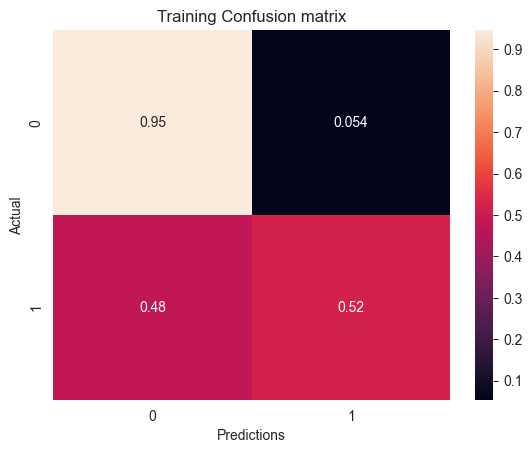

In [60]:
predict_accuracy_vis(X_train, train_target, 'Training')

Accuracy of predictions: 85.40%


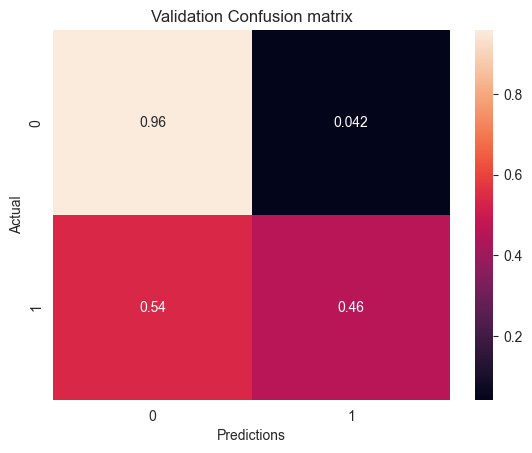

In [61]:
predict_accuracy_vis(X_val, val_target, 'Validation')

Accuracy of predictions: 84.20%


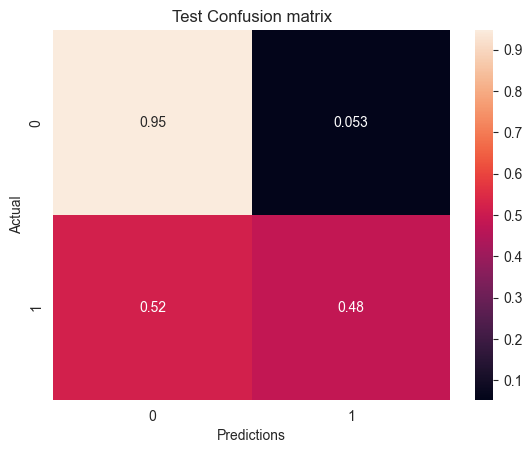

In [62]:
predict_accuracy_vis(X_test, test_target, 'Test')

Overall, we can say the model is good because it predicted the validation and test sets with accuracy scores of 85.4% and 84.2% respectively.

It is mostly a good idea to compare the model with a _dumb_ model such as a model that classifies randomly without taking into account the input features. 

Let's build two random models, check its accuracy and compare it to the accuracy of our trained model.

In [63]:
def random_guess(inputs):
    return np.random.choice(['Yes', 'No'], len(inputs))


def all_no(inputs):
    return np.full(len(inputs), 'No')

Checking the accuracy of the random model

In [64]:
accuracy_score(test_target, random_guess(test_inputs))

0.5024115130299495

From the results above, we can see that when we use the randome model, it has an accuracy of approximately 50%.

We now check the accuracy of the model with all _'No's'_

In [65]:
accuracy_score(test_target, all_no(test_inputs))

0.7734344612991054

The accuracy of the ```all_no``` model is approximately 77% which makes sense because most of the data points had a class of _'No'._ But our model still beats both of these dumb models which affirms that our model is doing well.

### MAKING PREDICTIONS ON A SINGLE DATA POINT.

In [66]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

We now convert this new data into a dataframe and preprocess it.

In [67]:
new_data_df = pd.DataFrame([new_input])

Imputing missing values

In [68]:
new_data_df[numeric_cols] = imputer.transform(new_data_df[numeric_cols])

Scaling numeric features

In [69]:
new_data_df[numeric_cols] = scaler.transform(new_data_df[numeric_cols])

Encoding the categorical columns.

In [70]:
new_data_df[encoded_cols] = encoder.transform(new_data_df[categorical_cols].fillna('Unknown')).toarray()

In [71]:
new_data_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.747642  0.718336  0.027493     0.028966  0.526244   

  WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SE  WindDir3pm_SSE  \
0         NNW       0.356589         NW  ...           0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  WindDir3pm_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  
0             0.0             0.0           0.0            1.0  

[1 rows x 124 columns]

We make predictions on the new processed data.

In [72]:
predictions = model.predict(new_data_df[numeric_cols + encoded_cols])
predictions

array(['Yes'], dtype=object)

The model predicted a _'yes'._ Now, let's check the probability of the prediction

In [73]:
probabilty = model.predict_proba(new_data_df[numeric_cols + encoded_cols])
probabilty

array([[0.48102697, 0.51897303]])

We can see that the model has only a 51% chance of _'Yes'_ which means the presiction above is not so accurate. There is a high chance it might turn out to be a _No_

Let's build a function that takes new data points as input, preprocesses them and make predictions. 

In [74]:
def predict_input(input_data):
    input_data_df = pd.DataFrame([input_data])
    input_data_df[numeric_cols] = imputer.transform(input_data_df[numeric_cols])
    input_data_df[numeric_cols] = scaler.transform(input_data_df[numeric_cols])
    input_data_df[encoded_cols] = encoder.transform(new_data_df[categorical_cols].fillna('Unknown')).toarray()

    X_new = input_data_df[numeric_cols + encoded_cols]
    pred = model.predict(X_new)[0]
    prob = model.predict_proba(X_new)[0][list(model.classes_).index(pred)]

    return [pred, prob]

In [75]:
predict_input(new_input)

['Yes', 0.5189730285018372]

We can save the train model and all the preprocessing objects and the important columns using joblib

In [77]:
rain_model_ = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [79]:
joblib.dump(rain_model_, 'rain_model_.joblib')

['rain_model_.joblib']

To load the data save, we can use ```joblib.load```

In [80]:
rain_model2 = joblib.load('./rain_model_.joblib')